<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Introdu%C3%A7%C3%A3o_Python/Trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlretrieve
from IPython.display import YouTubeVideo

In [2]:
## Exercicio 1 - Regressão linear em duas partes

URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')



('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7fc2bc6e2c10>)

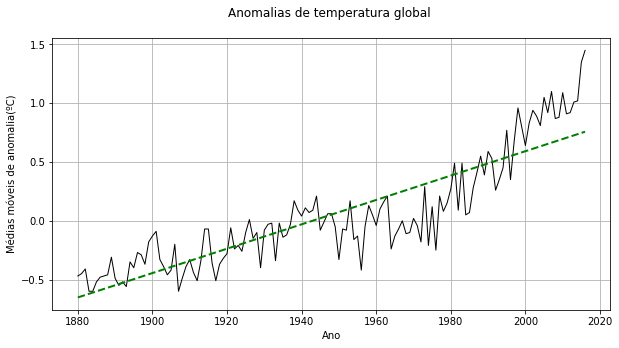

In [16]:
fname = 'land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = np.loadtxt(fname, delimiter = ',', skiprows= 5, unpack = True)

a, b = np.polyfit(year, temp_anomaly, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear = np.poly1d((a, b))  # Resulta na equação de regressão linear reg_lin = b + ax

plt.figure( figsize = (10,5))
plt.plot (year, temp_anomaly, color = 'black', linestyle = '-', linewidth = 1)
plt.plot(year, f_linear(year), 'green', linestyle = '--', linewidth = 2)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()

# Exercício 1 - Dividir a regressão linear em duas partes, conforme a imagem abaixo.

Se você olhar o gráfico acima, poderá notar que por volta de 1970 a temperatura começa a aumentar mais rápido do que a tendência anterior. Portanto, talvez uma única linha reta não nos dê um ajuste bom o suficiente.

E se quebrarmos os dados em dois (antes e depois de 1970) e fizermos uma regressão linear em cada segmento?

Para fazer isso, primeiro precisamos encontrar a posição em nosso array `year` onde o ano 1970 está localizado. Felizmente, o NumPy tem uma função chamada [`numpy.where ()`] (https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) que pode nos ajudar. Passamos uma condição e `numpy.where ()` diz-nos onde no array a condição é `True`.

### Enunciado: Dividir a regressão linear em duas partes, conforme a imagem abaixo:

![graf-2partes.png](https://www.dropbox.com/s/5lzr2s43hhgbteg/graf-2partes.png?dl=1)

90


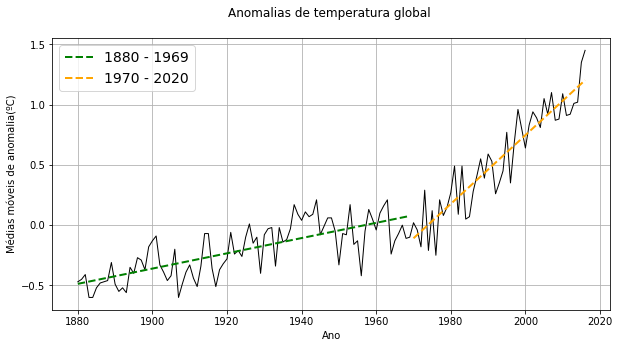

In [18]:

for i in range (len(year)): # Check the index for year 1970
  if year[i] == 1970:
    print(i)

year_1970 = year[0:90]
year_resto = year[90:]

temp_anomaly_1970 = temp_anomaly[0:90]
temp_anomaly_resto = temp_anomaly[90:]


a_1970, b_1970 = np.polyfit(year_1970, temp_anomaly_1970, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear_1970 = np.poly1d((a_1970, b_1970))  # Resulta na equação de regressão linear reg_lin = b + ax*

a_resto, b_resto = np.polyfit(year_resto, temp_anomaly_resto, 1) # polyfit(x,y,grau da regressão - nesse caso linear (1))
f_linear_resto = np.poly1d((a_resto, b_resto))  # Resulta na equação de regressão linear reg_lin = b + ax*

plt.figure(figsize = (10,5))
plt.plot(year, temp_anomaly, 'black', linewidth = 1)
plt.plot(year_1970, f_linear_1970(year_1970), 'green', linestyle = '--', linewidth = 2, label = '1880 - 1969')
plt.plot(year_resto, f_linear_resto(year_resto), 'orange', linestyle = '--', linewidth = 2, label = '1970 - 2020')
plt.legend(loc = 'best', fontsize = 14)
plt.title('Anomalias de temperatura global \n')
plt.xlabel('Ano')
plt.ylabel('Médias móveis de anomalia(ºC)')
plt.grid()


# Exercício 2 - Calcular o coeficiente de correlação de Pearson para cada um dos casos:
1) uma regressão linear

2) duas regressões lineares, nesse caso fazer a média dos coeficientes de correlação

Qual é o melhor ajuste de curvas? uma regressão linear ou duas? Use o coeficiente de correlação de Pearson para justificar sua resposta.

Para calcular o coeficiente de correlação de Pearson você pode usar duas bibliotecas: Numpy e Scipy.

Veja o manual de cada uma das funções (pearsonr e corrcoef) e resolva o exercício.

* [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
* [numpy.corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

In [26]:
# Determinar o coeficiente de correlação de pearson e o coeficiente de determinação (R²)


coef_corr_comp = scipy.stats.pearsonr(temp_anomaly, f_linear(year)) # Retorna uma tupla com a correlação, e p-value

coef_corr_1970 = scipy.stats.pearsonr(temp_anomaly_1970, f_linear_1970(year_1970))
coef_corr_resto = scipy.stats.pearsonr(temp_anomaly_resto, f_linear_resto(year_resto))
coef_corr_med = np.mean((coef_corr_1970[0],coef_corr_resto[0]))

coef_det_comp = coef_corr_comp[0] **2

coef_det_med = coef_corr_med **2


print('O coeficiente de correlação para uma regressão é: ' + str(coef_corr_comp[0]) + '\n'
 + 'O coeficiente de correlação para a média entre as duas regressões é: ' + str(coef_corr_med) + '\n' 
 + 'Os coeficientes de determinação (R²) para cada um dos casos acima, respectivamente são: ' +str(coef_det_comp)
 +' e ' + str(coef_det_med)) 



O coeficiente de correlação para uma regressão é: 0.8749403673678436
O coeficiente de correlação para a média entre as duas regressões é: 0.8344285251498132
Os coeficientes de determinação (R²) para cada um dos casos acima, respectivamente são: 0.7655206464497772 e 0.6962709635836926


# Exercício 3 - A regressão não linear em dados de CO$_2$ na atmosfera

#### Dados de Concentrações de Dióxido de Carbono Atmosférico CO$_2$ em partes por milhão (ppm)

**Fonte** :https://datahub.io/core/co2-ppm#resource-co2-ppm_zip

Os dados são provenientes do Laboratório de Pesquisa do Sistema Terrestre do Governo dos EUA, Divisão de Monitoramento Global. Duas séries principais são fornecidas: a série Mauna Loa (que tem a série contínua mais longa desde 1958) e uma série da média global (uma média global sobre locais de superfície marinhos).

1. Trends in Atmospheric Carbon Dioxide, Mauna Loa, Hawaii. Dr. Pieter Tans, NOAA/ESRL (www.esrl.noaa.gov/gmd/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/).

2. Trends in Atmospheric Carbon Dioxide, Global. Ed Dlugokencky and Pieter Tans, NOAA/ESRL (www.esrl.noaa.gov/gmd/ccgg/trends/).

In [28]:
# importação dos dados (O Prof. Emílio baixou os dados de Mauna Loa, Hawaii. Iremos trabalhar com esses dados)
URL = 'https://www.dropbox.com/s/7o6c7rlhzd0gd19/co2-mm-mlo_csv3.csv?dl=1'
urlretrieve(URL, 'co2-mm-mlo_csv3.csv')
fname = 'co2-mm-mlo_csv3.csv'
Year,Mean = np.loadtxt(fname, delimiter=',', skiprows=1, unpack=True)

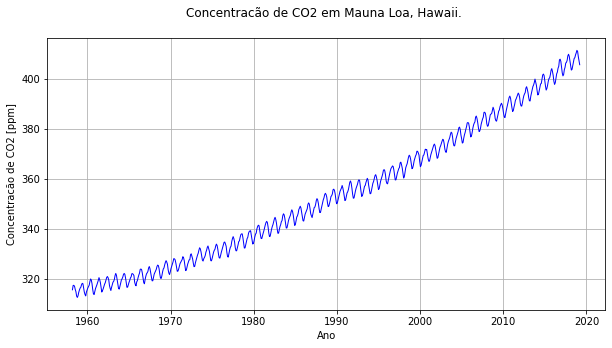

In [30]:
plt.figure(figsize=(10,5))
plt.plot(Year,Mean,color='blue', linestyle='-', linewidth=1)
plt.title('Concentracão de CO2 em Mauna Loa, Hawaii. \n')
plt.xlabel('Ano')
plt.ylabel('Concentracão de CO2 [ppm]')
plt.grid();


#### **Enunciado exercício 3**: Qual regressão linear que melhor se ajusta aos dados de CO$_2$ na atmosfera?

a) Regressão Linear?

b) Regressão não linear (quadrática)?

c) Outra?

In [38]:
# Regressão linear 

a_linear, b_linear = np.polyfit(Year, Mean, 1)
reg_lin = np.poly1d((a_linear, b_linear))

coef_corr_lin = scipy.stats.pearsonr(Mean, reg_lin(Year)) # Coeficiente de correlação (Linear)
print('O coeficiente de correlação linear é: ' + str(coef_corr_lin[0]))

# Regressão quadrática

a1_quad, a_quad, b_quad = np.polyfit(Year, Mean, 2)
reg_quad = np.poly1d((a1_quad, a_quad, b_quad))

coef_corr_quad = scipy.stats.pearsonr(Mean, reg_quad(Year)) # Coeficiente de correlação (Quad)
print('O coeficiente de correlação quadrática é: ' + str(coef_corr_quad[0]))

# # Regressão cúbica

a2_cub, a1_cub, a_cub, b_cub = np.polyfit(Year, Mean, 3)
reg_cub = np.poly1d((a2_cub, a1_cub, a_cub, b_cub))

coef_corr_cub = scipy.stats.pearsonr(Mean, reg_cub(Year)) # Coeficiente de correlação (Cubica)
print('O coeficiente de correlação cúbica é: ' + str(coef_corr_cub[0]))




O coeficiente de correlação linear é: 0.9886735075522145
O coeficiente de correlação quadrática é: 0.9967416233376151
O coeficiente de correlação cúbica é: 0.9967429628564769


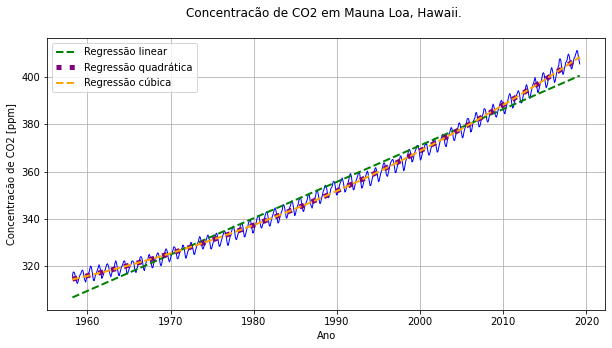

In [44]:
# Plot das regressões

plt.figure(figsize=(10,5))
plt.plot(Year,Mean,color='blue', linestyle='-', linewidth=1)
plt.plot(Year, reg_lin(Year), 'green', linestyle = '--', linewidth = 2, label = 'Regressão linear')
plt.plot(Year, reg_quad(Year), 'purple', linestyle = 'dotted', linewidth = 5, label = 'Regressão quadrática')
plt.plot(Year, reg_cub(Year), 'orange', linestyle = '--', linewidth = 2, label = 'Regressão cúbica')
plt.title('Concentracão de CO2 em Mauna Loa, Hawaii. \n')
plt.xlabel('Ano')
plt.ylabel('Concentracão de CO2 [ppm]')
plt.grid();
plt.legend(loc = 'best')

# Exercício 4 - Encontrando Raízes de equações com o Método da Bisseção

Encontre a raiz da equação $f(x) = x^2 - x - 1$ com o Método da Bisseção. Use $N = 25$ iterações e a busca da solução no intervalo $[1,2]$

Ajuda:
[Implementação do método da bisseção em Python](https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/)

Verifique que a solução é o número áureo, ver [Proporção aurea](https://pt.wikipedia.org/wiki/Propor%C3%A7%C3%A3o_%C3%A1urea).


In [46]:
def func (x):
  return x**2 - x - 1 # Intervalo [1,2] y=-1 p/ x_0=1; y=1 p/ x_1=2 (bisseção aplicável)

# Bissection method = x_new = x_0 + (x_1-x_0)/2

def bissection (func, interval_array,N):

  '''
  func = function to find root
  interval_array = domain interval
  N = number of iteractions 
  tol = tolerance of the root found
  '''
  interval_left, interval_right = interval_array[0], interval_array[1]

  if func(interval_left) * func(interval_right) < 0:  # Flag para saber se bisseção é aplicável
    print('Método da bisseção aplicável')
  else:
    print('Método da bisseção não aplicável')
  

  for i in range (N):
    
    new_interval = interval_left + (interval_right - interval_left)/2
    

    if func(new_interval) == 0:
      break
    
    elif func(interval_left) * func(new_interval) < 0:
      interval_right = new_interval
    
    else:
      interval_left = new_interval

  return new_interval

bissection(func(), [1,2], 25)








TypeError: ignored